In [ ]:
from surprise import KNNBasic, BaselineOnly, KNNWithMeans,KNNWithZScore, KNNBaseline
from surprise.model_selection import cross_validate
from surprise import Dataset
from surprise import Reader

In [ ]:
# ! pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3096318 sha256=a8f6496747ddca8ed64f2532f89f952b8bed4d8e38cf5b45a56a5c5abd0bdf67
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
import pandas as pd
df = pd.read_parquet(r"/content/user_item_ratio_stacked.parquet")
df.columns = ["userID", "itemID", "rating"]

In [ ]:
from surprise import SVD, NMF, SlopeOne, KNNBasic, KNNWithMeans, KNNBaseline, CoClustering, BaselineOnly, NormalPredictor
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=7)

In [ ]:
reader = Reader()
data = Dataset.load_from_df(df[["userID", "itemID", "rating"]], reader)

In [ ]:
param_grid = {'n_factors': [10,20,30,40,50], 'n_epochs': [20], 'reg_all': [0.1]}
gs_svd = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5)
gs_svd.fit(data)
svd = gs_svd.best_estimator['rmse']
print(gs_svd.best_score['rmse'])
print(gs_svd.best_params['rmse'])

0.23743443005849824
{'n_factors': 40, 'n_epochs': 20, 'reg_all': 0.1}


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
cv_results_svd

,split0_test_rmse,split1_test_rmse,split2_test_rmse,split3_test_rmse,split4_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,split0_test_mae,split1_test_mae,...,std_test_mae,rank_test_mae,mean_fit_time,std_fit_time,mean_test_time,std_test_time,params,param_n_factors,param_n_epochs,param_reg_all
0,0.236903,0.237697,0.237087,0.238203,0.237283,0.237435,0.000466,3,0.089213,0.089547,...,0.000305,3,9.813718,0.421974,2.481790,0.538471,"{'n_factors': 10, 'n_epochs': 20, 'reg_all': 0.1}",10,20,0.1
1,0.236902,0.237698,0.237087,0.238203,0.237282,0.237435,0.000466,4,0.089213,0.089547,...,0.000305,4,11.493316,1.017250,1.842877,0.595590,"{'n_factors': 20, 'n_epochs': 20, 'reg_all': 0.1}",20,20,0.1
2,0.236902,0.237697,0.237087,0.238203,0.237282,0.237434,0.000466,2,0.089213,0.089547,...,0.000305,2,11.321008,0.572070,1.770005,0.514207,"{'n_factors': 30, 'n_epochs': 20, 'reg_all': 0.1}",30,20,0.1
3,0.236903,0.237697,0.237087,0.238203,0.237282,0.237434,0.000466,1,0.089213,0.089547,...,0.000305,1,12.579407,0.390360,1.964879,0.949380,"{'n_factors': 40, 'n_epochs': 20, 'reg_all': 0.1}",40,20,0.1
4,0.236903,0.237698,0.237087,0.238203,0.237283,0.237435,0.000466,5,0.089213,0.089547,...,0.000305,5,13.436054,0.498174,1.748894,0.715299,"{'n_factors': 50, 'n_epochs': 20, 'reg_all': 0.1}",50,20,0.1


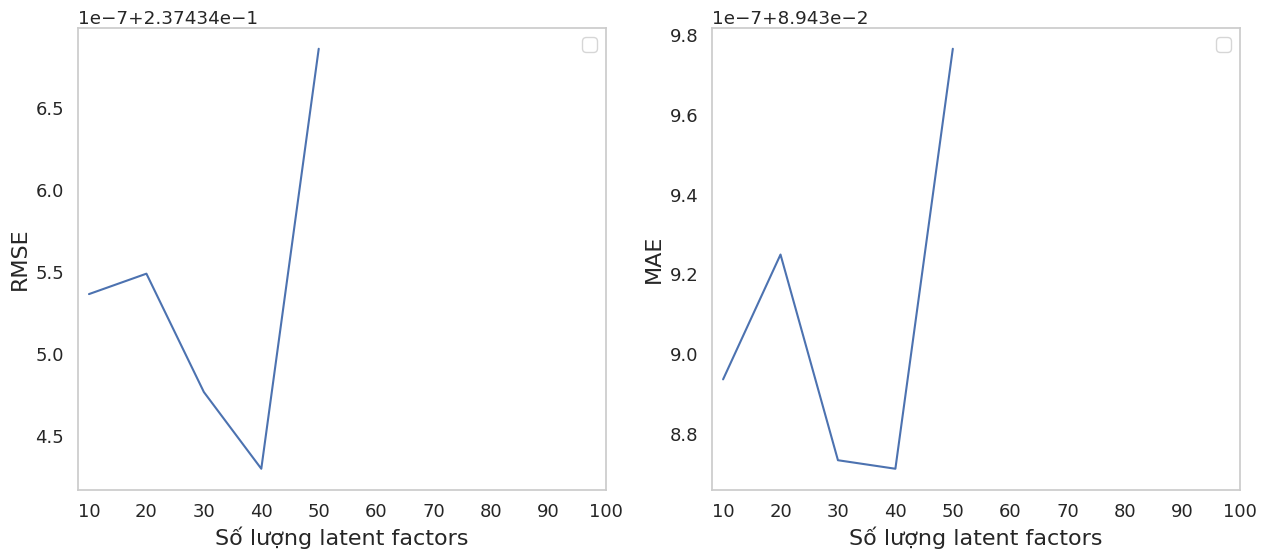

In [ ]:
cv_results_svd = pd.DataFrame(gs_svd.cv_results)
fig = plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.plot(cv_results_svd['mean_test_rmse'])
plt.xticks(np.arange(10), np.arange(10, 101, 10), fontsize=13)  # Update the upper limit to 101
plt.yticks(fontsize=13)
plt.xlabel('Số lượng latent factors', fontsize=16)
plt.ylabel('RMSE', fontsize=16)
plt.grid()
plt.legend()

plt.subplot(122)
plt.plot(cv_results_svd['mean_test_mae'])
plt.xticks(np.arange(10)
plt.xlabel('Số lượng latent factors', fontsize=16)
plt.ylabel('MAE', fontsize=16)
plt.grid()
plt.legend()

plt.show()


In [ ]:
from surprise import Reader, Dataset, SVD, SVDpp, NMF, KNNBaseline , accuracy

In [ ]:
svdpp = SVDpp()

In [ ]:
param_grid = {'lr_all': [0.001, 0.003, 0.005, 0.007, 0.009], 'reg_all': [0.005, 0.01, 0.015, 0.02, 0.025]}
gs_svdpp = GridSearchCV(SVDpp, param_grid, measures=['rmse', 'mae'], cv=3)
gs_svdpp.fit(data)
svdpp = gs_svdpp.best_estimator['rmse']
print(gs_svdpp.best_score['rmse'])
print(gs_svdpp.best_params['rmse'])

0.23742809087736358
{'lr_all': 0.003, 'reg_all': 0.025}


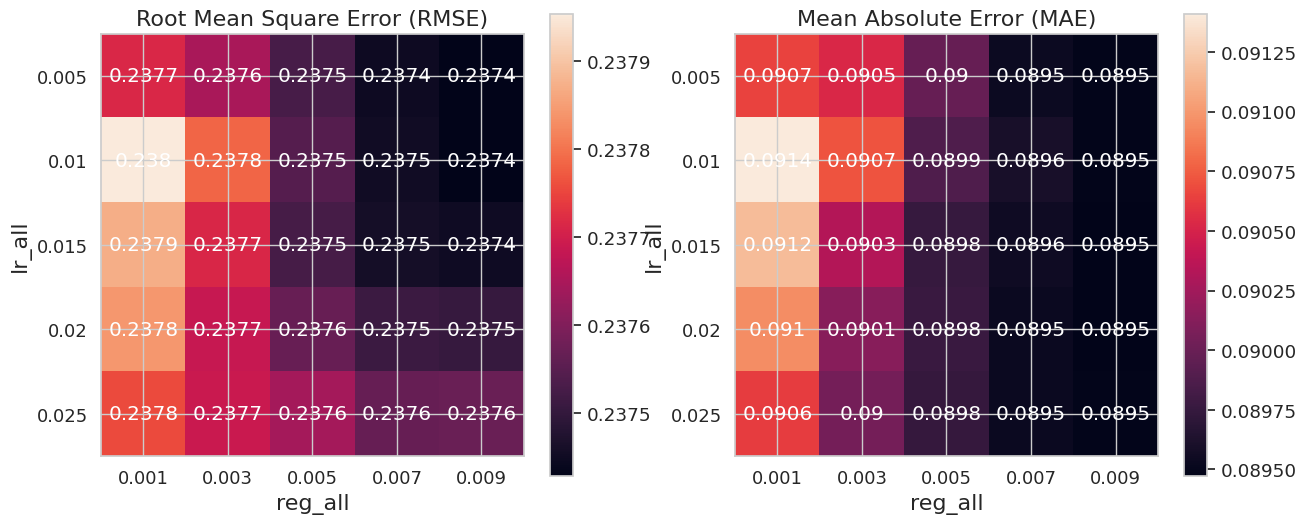

In [ ]:
cv_results_svdpp = pd.DataFrame(gs_svdpp.cv_results)
svdpp_rmse = np.array(cv_results_svdpp['mean_test_rmse']).reshape(5,5)
svdpp_mae = np.array(cv_results_svdpp['mean_test_mae']).reshape(5,5)
fig = plt.figure(figsize=(15,6))
ax1 = plt.subplot(121)
im1 = ax1.imshow(svdpp_rmse)
cbar = ax1.figure.colorbar(im1, ax=ax1)
ax1.set_xticks(np.arange(5))
ax1.set_yticks(np.arange(5))
ax1.set_xticklabels(param_grid['lr_all'], fontsize=13)
ax1.set_yticklabels(param_grid['reg_all'], fontsize=13)
for i in range(5):
    for j in range(5):
        text = ax1.text(j, i, round(svdpp_rmse[i][j], 4), ha="center", va="center", color="w")
ax1.set_xlabel('reg_all', fontsize=16)
ax1.set_ylabel('lr_all', fontsize=16)
ax1.set_title('Root Mean Square Error (RMSE)', fontsize=16)
ax2 = plt.subplot(122)
im2 = ax2.imshow(svdpp_mae)
cbar = ax2.figure.colorbar(im2, ax=ax2)
ax2.set_xticks(np.arange(5))
ax2.set_yticks(np.arange(5))
ax2.set_xticklabels(param_grid['lr_all'], fontsize=13)
ax2.set_yticklabels(param_grid['reg_all'], fontsize=13)
for i in range(5):
    for j in range(5):
        text = ax2.text(j, i, round(svdpp_mae[i][j], 4), ha="center", va="center", color="w")
ax2.set_xlabel('reg_all', fontsize=16)
ax2.set_ylabel('lr_all', fontsize=16)
ax2.set_title('Mean Absolute Error (MAE)', fontsize=16)
plt.show()


In [ ]:
param_grid = {'k': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'sim_options': {'user_based': [True, False]},\
              'bsl_options': {'method': ['als', 'sgd']}}
gs_knn = GridSearchCV(KNNBaseline, param_grid, measures=['rmse', 'mae'], cv=3)
gs_knn.fit(data)
print(gs_knn.best_score['rmse'])
print(gs_knn.best_params['rmse'])

Estimating biases using als...


In [ ]:
# Tính toán số lượng người dùng duy nhất
total_users = df['userID'].nunique()

# Số lượng người dùng trong subset
subset_users = int(0.025 * total_users)

# Lấy danh sách ngẫu nhiên của userID trong subset
subset_user_ids = np.random.choice(df['userID'].unique(), size=subset_users, replace=False)

# Tạo subset DataFrame với các userID thuộc subset_user_ids
subset_df = df[df['userID'].isin(subset_user_ids)]

In [ ]:
reader = Reader()
dfsv = Dataset.load_from_df(subset_df[['userID', 'itemID', 'rating']], reader)
cv_train = Dataset.load_from_df(subset_df[['userID', 'itemID', 'rating']], reader)

In [ ]:
import datetime
import numpy as np

In [ ]:
# Use k-NN algorithm with user-based collaborative filtering and cosine similarity
kk = 2
sim_options = {'name': 'cosine', 'user_based': True}
algo = KNNBasic(k = kk, sim_options = sim_options, verbose = True)

In [ ]:
subset_df

,userID,itemID,rating
24,15910.0,0,1.000000
67,15947.0,2,1.000000
166,16048.0,2,1.000000
183,16074.0,8,1.000000
268,16196.0,2,0.529412
...,...,...,...
1099881,1553216.0,0,1.000000
1099920,1553267.0,0,1.000000
1100012,1553387.0,0,1.000000
1100076,1553461.0,0,1.000000


In [ ]:
# Run 5-fold cross-validation and print results
cv = cross_validate(algo, dfsv, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)

In [ ]:
CVResults = pd.DataFrame(columns = ['Model','RMSE','MAE','Timespan'])

data = cv_train
kf = KFold(2, random_state=0)

model  = SVD


start = datetime.datetime.now()
out = cross_validate(model(), data, ['rmse', 'mae'], kf)
mean_rmse = '%.5f' % np.mean(out['test_rmse'])
mean_mae = '%.5f' % np.mean(out['test_mae'])
cv_time = str(datetime.datetime.now() - start)[:-3]


CVResults = CVResults.append({'Model': model, 'RMSE': mean_rmse, 'MAE': mean_mae, 'Timespan': cv_time}, ignore_index=True)


print('All models have run. Call the CVResults dataframe for results.')

In [ ]:
CVResults

In [ ]:
CVResults = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'Timespan'])

data = cv_train
kf = KFold(5, random_state=0)
from surprise.prediction_algorithms.knns import KNNBasic
sim_options = {'name': 'cosine',
               'user_based': False
               }
model = KNNBasic(k=40, sim_options=sim_options)

start = datetime.datetime.now()
out = cross_validate(model, data, ['rmse', 'mae'], kf)
mean_rmse = '%.5f' % np.mean(out['test_rmse'])
mean_mae = '%.5f' % np.mean(out['test_mae'])
cv_time = str(datetime.datetime.now() - start)[:-3]

CVResults = CVResults.append({'Model': str(model), 'RMSE': mean_rmse, 'MAE': mean_mae, 'Timespan': cv_time}, ignore_index=True)

print('All models have run. Call the CVResults dataframe for results.')


In [ ]:
data

In [ ]:
sim_options = {
    'name': 'MSD',
    'user_based': 'True'
}

cv_results = []
for k in range(1, 4):
  clf = KNNBasic(k= k  , sim_options = sim_options)
  cv_results.append(cross_validate(clf, data, measures=['MAE'], cv=5, verbose=False))

for i in range(10):
  print("Average MAE for k = {} ".format((i+1)*10), cv_results[i]["test_mae"].mean())